### Echo Input Network
Below we create a simple Recurrent Network that echos its output.  This is from the [medium website](https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767).

New data, epoch 0
Step 0 Loss 0.855335
Step 100 Loss 0.713337
Step 200 Loss 0.69657
Step 300 Loss 0.695359
Step 400 Loss 0.695152
Step 500 Loss 0.694017
Step 600 Loss 0.694661
New data, epoch 1
Step 0 Loss 0.692541
Step 100 Loss 0.699732
Step 200 Loss 0.680656
Step 300 Loss 0.696014
Step 400 Loss 0.690947
Step 500 Loss 0.689452
Step 600 Loss 0.691639
New data, epoch 2
Step 0 Loss 0.67008
Step 100 Loss 0.49427
Step 200 Loss 0.235928
Step 300 Loss 0.0619396
Step 400 Loss 0.0699394
Step 500 Loss 0.0173282
Step 600 Loss 0.0124167
New data, epoch 3
Step 0 Loss 0.261848
Step 100 Loss 0.0156045
Step 200 Loss 0.0069113
Step 300 Loss 0.00756272
Step 400 Loss 0.00500677
Step 500 Loss 0.00452505
Step 600 Loss 0.00432642
New data, epoch 4
Step 0 Loss 0.187551
Step 100 Loss 0.00372246
Step 200 Loss 0.00297095
Step 300 Loss 0.00266187
Step 400 Loss 0.00281295
Step 500 Loss 0.00281151
Step 600 Loss 0.00244288
New data, epoch 5
Step 0 Loss 0.182413
Step 100 Loss 0.0026186
Step 200 Loss 0.00257947
Step

Step 400 Loss 0.000148751
Step 500 Loss 0.000183817
Step 600 Loss 0.000248709
New data, epoch 43
Step 0 Loss 0.144656
Step 100 Loss 0.000232883
Step 200 Loss 0.000163264
Step 300 Loss 0.000175333
Step 400 Loss 0.000229343
Step 500 Loss 0.000190142
Step 600 Loss 0.000226083
New data, epoch 44
Step 0 Loss 0.167028
Step 100 Loss 0.00020251
Step 200 Loss 0.000211997
Step 300 Loss 0.000188483
Step 400 Loss 0.000157917
Step 500 Loss 0.000194398
Step 600 Loss 0.000201494
New data, epoch 45
Step 0 Loss 0.149952
Step 100 Loss 0.000150734
Step 200 Loss 0.000155036
Step 300 Loss 0.000154955
Step 400 Loss 0.000144336
Step 500 Loss 0.000200876
Step 600 Loss 0.000133511
New data, epoch 46
Step 0 Loss 0.163521
Step 100 Loss 0.000177927
Step 200 Loss 0.000121671
Step 300 Loss 0.000174556
Step 400 Loss 0.000145178
Step 500 Loss 0.000158593
Step 600 Loss 0.000185891
New data, epoch 47
Step 0 Loss 0.14867
Step 100 Loss 0.000166081
Step 200 Loss 0.000156531
Step 300 Loss 0.000158309
Step 400 Loss 0.000186

Step 500 Loss 8.9562e-05
Step 600 Loss 9.6279e-05
New data, epoch 85
Step 0 Loss 0.151011
Step 100 Loss 8.9031e-05
Step 200 Loss 9.42709e-05
Step 300 Loss 9.62427e-05
Step 400 Loss 0.000118321
Step 500 Loss 0.000112653
Step 600 Loss 9.55012e-05
New data, epoch 86
Step 0 Loss 0.154882
Step 100 Loss 9.36028e-05
Step 200 Loss 0.000108336
Step 300 Loss 0.000100084
Step 400 Loss 8.19171e-05
Step 500 Loss 8.66533e-05
Step 600 Loss 8.97308e-05
New data, epoch 87
Step 0 Loss 0.14721
Step 100 Loss 8.32234e-05
Step 200 Loss 9.41894e-05
Step 300 Loss 0.000109029
Step 400 Loss 8.27844e-05
Step 500 Loss 8.64431e-05
Step 600 Loss 8.91418e-05
New data, epoch 88
Step 0 Loss 0.185256
Step 100 Loss 8.52434e-05
Step 200 Loss 8.74407e-05
Step 300 Loss 0.000105109
Step 400 Loss 9.64291e-05
Step 500 Loss 8.88519e-05
Step 600 Loss 9.10245e-05
New data, epoch 89
Step 0 Loss 0.137872
Step 100 Loss 0.000116477
Step 200 Loss 0.000102318
Step 300 Loss 8.9543e-05
Step 400 Loss 6.76249e-05
Step 500 Loss 9.27983e-05

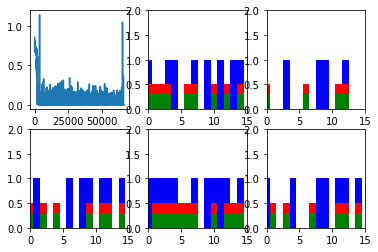

In [10]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels = labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()